# Práctica 1. Aprendizaje automático

Adina Han, Diego Ambite 

## Parte 1: Agrupamiento o clustering

1. Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, su distribución y su correlación.

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.datasets.samples_generator import make_blobs
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing

In [14]:
 data_crimes = pd.read_csv('USArrests.csv', index_col = 0)  

In [15]:
data_crimes.keys()

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

Tabla con el nombre de las variables

In [43]:
df = pd.DataFrame(data=data_crimes) 
df

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


Tabla de estadísticos descriptivos de cada variable

In [44]:
df.describe()
#std -> standard deviation , a measure of a distribution of the array elements

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Tabla de tipos de las variables

In [45]:
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

Conclusiones: 

2. Considera si debes re‐escalar las variables antes y el tipo de escalado que usas. Razona tu elección.

In [46]:
#standardize the data to normal distribution

data_crimes_standardized = preprocessing.scale(data_crimes)
print(data_crimes_standardized)
data_crimes_standardized = pd.DataFrame(data_crimes_standardized)

[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

Hemos elegido reescalar las variables del dataset para tener una mayor homogeneidad....

3. Aplica un algoritmo de clustering de los que hemos visto en clase con una parametrización (el valor de k en el algoritmo de k‐medias, o la forma en la que se agrupan clusters en el caso jerárquico).
Determina el número de clusters que consideras adecuado para el conjunto de datos y justifica tu elección.

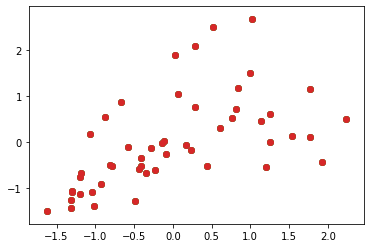

In [51]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[0], data_crimes_standardized[3])

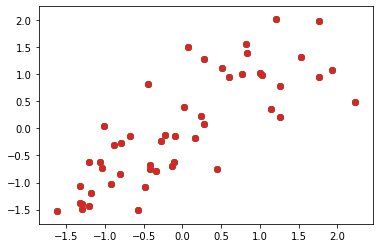

In [52]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[0], data_crimes_standardized[1])

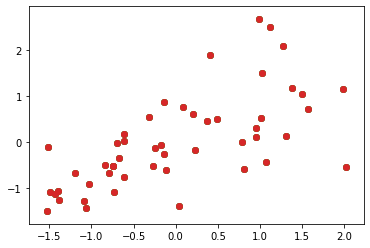

In [53]:
for plot in data_crimes_standardized:
    plt.scatter(data_crimes_standardized[1], data_crimes_standardized[3])

In [36]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_crimes_standardized)

y_kmeans

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

In [ ]:
#scatter plots

In [47]:
data = scale(data)

NameError: name 'scale' is not defined

In [62]:
real_centers = [[1, 1], [5, 5], [7, 3]]
stds = [1, 0.7, 1.7]
X, labels = make_blobs(n_samples = len(df),n_features=4, centers = None, cluster_std = stds, random_state=333)

print('Número de elementos:', len(X))
print('Primeros elementos de X:', X[0:10])
print('Primeras elementos de labels:', labels[0:10])

Número de elementos: 50
Primeros elementos de X: [[ 5.75192028  4.50963703]
 [ 4.56362762 -1.7126833 ]
 [ 6.01274201  6.4477141 ]
 [ 2.82559469  1.15247206]
 [ 4.50363698  4.71211937]
 [ 5.13726795  4.1753433 ]
 [ 1.31806253  1.26717197]
 [ 0.52678756  0.68649892]
 [ 1.27269254  0.78704179]
 [ 1.52058482 -0.12161661]]
Primeras elementos de labels: [1 2 1 0 1 1 0 0 0 0]


In [63]:
def plot_clusters(X, labels=None, centers=None):
    """ Función auxiliar para pintar los puntos de los clusters y, optativamente, sus centros.
    :param X: array de puntos de dos dimensiones (array de array de enteros)
    :param labels: cluster al que pertenece cada punto (array de enteros)
    :param centers: coordenadas de los centroides de los clusters (array de array de enteros)
    """
    
    colors = ['r','g','b','c','y','k','w','m',]
    fig = plt.figure(figsize=(8,8))
    
    # Los dos primeros parámetros de la función scatter son las coordenadas de los puntos,
    # el parámetro 'c' indica la clase asignada de cada punto, y 'cmap' se usa para colorear 
    # las distintas clases
    plt.scatter(X[:,0], X[:,1], c=labels, cmap=ListedColormap(colors))
    
    # Pintar los centroides de los clusters
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], marker="x", color='k', s=150, linewidths = 5, zorder=10)
        
    plt.show()

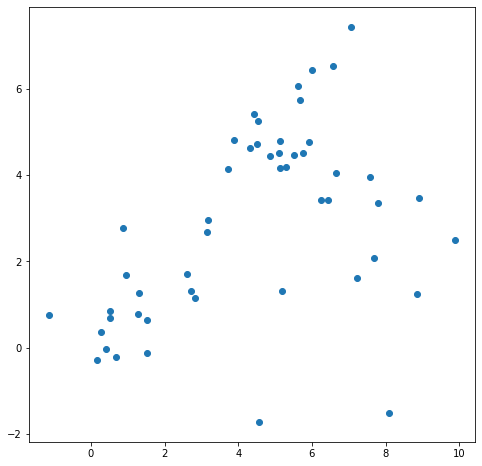

In [64]:
plot_clusters(X)

4. Da un sentido a cada uno de los clusters que has obtenido en el contexto del problema que representa el conjunto de datos. Si obtienes un número mayor de 4 clusters, comenta solamente los dos los dos más numerosos y los dos menos numerosos. Para analizar los clusters:


Usa estadísticos descriptivos (número de individuos, media, desviación típica, mediana,
 cuartiles) para describir los clusters.

Usa una matriz de gráficos de dispersión que pinte los clusters usando un color diferente para ver la separación de los clusters en función de cada par de variables de entrada. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se cofunden más? Para ello, usa la función seaborn.pair_plot de la librería de representación gráfica seaborn, como puedes ver en este ejemplo

## Parte 2: Clasificación

1. Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables y su distribución entre las dos clases. Como únicamente son dos clases, prueba a representar los datos con la función seaborn.pair_plot usa la opción corner=True para evitar pintar excesivas variables.

2. Considera si debes normalizar o estandarizar las variables antes para usar un árbol de decisión. Razona tu elección.

3. Configura una partición de los datos con un 30% para el conjunto de test y estratificando la muestra.
Analiza los resultados de entrenamiento y test que obtiene un árbol de decisión en función de uno de los parámetros que regulan la capacidad de aprendizaje del árbol (elige el que consideres oportuno). Pinta la evolución de la curva de aprendizaje.
Determina el valor óptimo de dicho parámetro de manera razonada.

4. Pinta el árbol de decisión óptimo que has encontrado y analiza lo siguiente:

a) Interpreta someramente la pregunta que se realiza en el nodo raíz y los nodos hijos resultantes. Hazlo tanto en el contexto de un problema de clasificación (¿qué clases ha clasificado mejor?), como en el del problema representado en el conjunto de datos (¿qué sentido tiene esa pregunta y la clasificación que infiere dentro del problema?).

b) Analiza qué variables tienen mayor poder discriminante.

c) Analiza si hay variables del conjunto de datos que no se han usado (en este caso, mejor indica qué tipo de propiedades no ha usado el árbol, y qué tipo de medidas no ha usado).

d) Identifica los nodos hoja en los que existe mayor confusión, o que creas que han podido generar particiones poco generalizables.

5. Pinta un árbol de decisión sub-óptimo que sobreaprenda. Por ejemplo, el que se obtiene para el siguiente valor al óptimo en la curva de aprendizaje que realizaste.
Identifica los nodos nuevos.

6. Crea la matriz de confusión de los datos de test. Analiza también los valores de “precision” y “recall” (exhaustividad) para cada una de las clases (usa para ello sklearn.metrics.classification_report).

7. Configura un clasificador k-NN para la misma partición de datos.

a) Dado que el conjunto de datos tiene muchas variables, elige según tu criterio entre tres y cinco variables para medir distancias entre las observaciones. Puedes usar aquellas variables que mejor separen las clases según la inspección visual del punto 1 o según el árbol óptimo del punto 4.

b) Determina si tiene sentido o no escalar los datos.

c) Encuentra el valor óptimo de k que no sobreaprenda.

d) Compara los resultados de precisión y exhaustividad de ese k-NN óptimo con los que obtiene el árbol de decisión.

## Parte 3: Regresión

0. Antes de empezar vamos a eliminar la variable “Region” del conjunto de datos, ya que no la usaremos para predecir.
Además, utiliza la función dropna que elimina de un data frame todas las filas (es decir, observaciones) que tienen un valor perdido (na quiere decir not available) para alguna variable. De esta forma, no tendrás que preocuparte por imputar un valor a dichas observaciones. Asegúrate de que el dataframe resultante no tiene la variable Region, ni valores perdidos.

1. Describe el conjunto de datos tal y como se indica más arriba y extrae algunas conclusiones de las variables, especialmente a la matriz de gráficos de dispersión y al coeficiente de correlación de la variable objetivo (GDP) con el resto de variables. ¿Hay variables que tengan una relación clara con ella?

2. Establece un criterio en base al coeficiente de correlación para filtrar aquellas variables que tengan poca relación (ya sea directa o inversa) con la variable objetivo. Di qué variables pasan tu filtro y qué coeficiente de correlación tienen con ella.

3. Considera si debes normalizar o estandarizar las variables antes para usar un perceptrón multicapa de decisión. Razona tu elección.

4. Configura una validación cruzada con k=5 y dos perceptrones multicapa

      • MLP1 con una capa oculta de 200 neuronas

      • MLP2 con dos capas ocultas de 50 neuronas cada una

Pinta la curva de aprendizaje para cada perceptrón variando el parámetro alpha que controla el aprendizaje del perceptrón y determina el valor óptimo (es decir aquel que maximiza el Mean Square Error en negativo).
Asegúrate de que no salen warnings indicando que no se ha alcanzado la convergencia durante el entrenamiento (basta con poner un número de max_iter suficientemente grande).
¿Alguno de los dos perceptrones domina al otro? ¿Por qué crees que se producen las diferencias?

5. Entrena el perceptrón elegido con todo el conjunto de datos y genera las predicciones del GDP que hace el perceptrón para todo los países.
A continuación, píntalas en un diagrama de dispersión frente a los valores observados para el GDP (en el eje Y) y pinta la recta que se genera con la predicción perfecta de todos los valores.
Detecta países para los cuales el perceptrón a infraestimado más su GDP (aproximadamente). Idem con países donde se ha sobreestimado mucho su GDP. ¿Puedes aventurar alguna razón por la que esos países tienen más (o menos) GDP del que el perceptrón les asigna? ¿Es realmente un problema del perceptrón o eres capaz de ver alguna razón económica, política o social?